# Bibliotecas

In [161]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from dateutil.parser import parse


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm

# balancear os dados
import imblearn
# valanceamento e clase - oversmpling
from imblearn.over_sampling import SMOTE

# Leitura do banco de dados

In [538]:
df = pd.read_csv('online_shoppers_intention.csv')

In [539]:
df.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0,0.0,2,33.000000,0.000000,0.100000,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
96,0,0.0,0,0.0,6,1566.500000,0.050000,0.066667,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
97,0,0.0,0,0.0,4,105.000000,0.000000,0.025000,0.0,0.6,Feb,1,1,1,4,Returning_Visitor,False,False
98,0,0.0,1,0.0,7,50.000000,0.038095,0.080952,0.0,0.6,Feb,2,4,1,7,Returning_Visitor,False,False


In [540]:
type(df['Month'].iloc[0])

str

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [542]:
df.shape

(12330, 18)

In [543]:
df_colunas = df.columns.to_list
df_colunas

<bound method IndexOpsMixin.tolist of Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')>

# Tratando os dados

In [544]:
df_tratamento = df

### Dados faltantes

In [591]:
df_tratamento.isnull().sum()

Administrative                     0
Administrative_Duration            0
Informational                      0
Informational_Duration             0
ProductRelated                     0
ProductRelated_Duration            0
BounceRates                        0
ExitRates                          0
PageValues                         0
SpecialDay                         0
OperatingSystems                   0
Browser                            0
Region                             0
TrafficType                        0
Weekend                            0
VisitorType_Other                  0
VisitorType_Returning_Visitor      0
Month                            288
Revenue                            0
dtype: int64

In [592]:
#Como são poucas linhas eu prefico remover as linhas 
df_tratamento.dropna(inplace =True)

In [605]:

np.bincount(df_tratamento.Revenue)

array([10163,  1879], dtype=int64)

In [593]:
df_tratamento.isnull().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Weekend                          0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Month                            0
Revenue                          0
dtype: int64

## Tratando valores, object

In [548]:
# Mudando os valores True e False para 1 e 0
df_tratamento['Revenue'] = df_tratamento['Revenue'].map({True:1,False:0})
df_tratamento['Weekend'] = df_tratamento['Weekend'].map({True:1,False:0})

In [549]:
df_tratamento['Month'] = df_tratamento['Month'].apply(lambda x:x.title())

In [550]:
# Transformando a coluna Month em Datetime
df_tratamento.Month = pd.to_datetime(df_tratamento.Month,format='%b', errors='coerce').dt.month

In [551]:
df_tratamento['Month'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Month, dtype: float64

In [552]:
df_tratamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12042 non-null  float64
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [553]:
df_tratamento.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,Returning_Visitor,1,0


## Tratamento utilizando Variaveis dummies

In [554]:
cat_feats1 = ['VisitorType']

In [555]:
df_tratamento = pd.get_dummies(df_tratamento,columns=cat_feats1,drop_first=True)

In [556]:
df_tratamento.shape

(12330, 19)

In [557]:
df_tratamento.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,1,0,0,1


### Ordenar o dataframe

In [558]:
df_tratamento.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [559]:
df_tratamento = df_tratamento[[
    'Administrative', 
    'Administrative_Duration', 
    'Informational',
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration',
    'BounceRates', 
    'ExitRates', 
    'PageValues', 
    'SpecialDay',
    'OperatingSystems', 
    'Browser', 
    'Region', 
    'TrafficType', 
    'Weekend', 
    'VisitorType_Other', 
    'VisitorType_Returning_Visitor',
    'Month',
    'Revenue']]

In [560]:
df_tratamento.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor,Month,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,2.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,2.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,2.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,2.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,1,2.0,0


# Normalizando os dados: Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)

In [594]:
df_normalizado = df_tratamento

In [562]:
from sklearn.preprocessing import StandardScaler

In [563]:
scaler = StandardScaler()

In [564]:

scaler.fit(df_normalizado.drop('Revenue',axis=1))

StandardScaler()

In [565]:
scaled_features = scaler.transform(df_normalizado.drop('Revenue',axis=1))

In [566]:
df_feat = pd.DataFrame(scaled_features,columns=df_normalizado.columns[:-1])
df_feat.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor,Month
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,-0.083316,0.410621,-1.662582
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,-0.083316,0.410621,-1.662582
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,-0.550552,-0.083316,0.410621,-1.662582
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,-0.550552,-0.083316,0.410621,-1.662582
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1.816360,-0.083316,0.410621,-1.662582


In [601]:
# Foi preciso remover mais alguns dados faltantes
df_feat.dropna(inplace =True)

### Observando os dados de pessoas que compraram e não compraram

<AxesSubplot:title={'center':'Venda ou não'}, xlabel='Revenue', ylabel='count'>

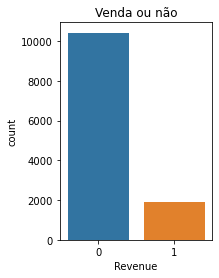

In [567]:
# Podemos observar que existe uma disparidade muito grade entre as amostras
# Isso pode comprometer a estrutura do modelo
# Fazendo o modelo ser muito mais eficiente em uma amostra do que na outra
plt.subplot(1,2,2)
plt.title('Venda ou não')
sns.countplot(df['Revenue'])

#### Separando os dados e as classes

In [603]:
x = df_feat
y = df_normalizado.Revenue

In [604]:
# Visualizando a quantidade de dados por classe
np.bincount(y)

array([10163,  1879], dtype=int64)

#### Instância do SMOTE

In [606]:
# sampling_strategy = 0.5  <- parametro importante
seed = 100
smt = SMOTE(random_state= seed)

In [607]:
X, Y = smt.fit_resample(x,y)

### Plot gráfico

Text(0.5, 0, 'Não compraram / compraram')

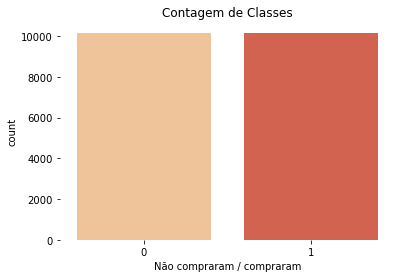

In [609]:
sns.countplot(Y,palette= 'OrRd')
plt.box(False)
plt.title('Contagem de Classes')

plt.xlabel('Não compraram / compraram')

# Modelo rfb

### Separando Treino e teste

In [610]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,Y, test_size=0.3,  random_state=42)

### Configurando o modelo

In [617]:
modelo_v5 = svm.SVC(kernel='rbf')

In [618]:
# Faixa dos parametros que serão modificados para melhor convergencia
c_range = np.array([50.,100.,200.])
gamma_range = np.array([0.3,0.001,3*0.001])

In [619]:
# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = c_range)

In [622]:
# Grid search
modelo_v5_grid_search_rbf = GridSearchCV(modelo_v5,svm_param_grid,cv=3)

## Treinando o modelo

In [623]:
# Treinamento
modelo_v5_grid_search_rbf.fit(X_treino,y_treino)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([ 50., 100., 200.]),
                         'gamma': array([0.3  , 0.001, 0.003])})

In [625]:
print(f'Acurácia em treinamento:{modelo_v5_grid_search_rbf.best_score_ :.2%}')
print(f'Hiperparâmentros Ideais:{modelo_v5_grid_search_rbf.best_params_}')

Acurácia em treinamento:92.10%
Hiperparâmentros Ideais:{'C': 50.0, 'gamma': 0.3}


## Previsão

In [626]:
previsao_v5 = modelo_v5_grid_search_rbf.predict(X_teste)

In [627]:
SVM_dict_v5={'Modelo':'SVM',
            'Versão':'5',
            'Kernel':'Otimização de hiperparâmetros com Grid Search e kernel RBF',
            'Precision':precision_score(previsao_v5,y_teste),
            'Recall':recall_score(previsao_v5,y_teste),
            'F1 Score':f1_score(previsao_v5,y_teste),
            'Acurácia':accuracy_score(previsao_v5,y_teste),
            'AUC':roc_auc_score(previsao_v5,y_teste)}

# Resultados

In [628]:
SVM_dict_v5

{'Modelo': 'SVM',
 'Versão': '5',
 'Kernel': 'Otimização de hiperparâmetros com Grid Search e kernel RBF',
 'Precision': 0.966394779771615,
 'Recall': 0.9218798630563336,
 'F1 Score': 0.9436126154826379,
 'Acurácia': 0.9419481797310594,
 'AUC': 0.9430889783219276}